In [1]:
Packages <- c("dplyr","broom","cubature", "geosphere", "data.table",  "ggplot2", "bbmle", "dplyr","tidyr", "stringr", "tidyverse", "lubridate", "RColorBrewer")

invisible(suppressPackageStartupMessages(lapply(Packages, library, character.only = TRUE)))

setwd('/local/home/katrinac/oceanography')
"%!in%" <- function(x,table) match(x,table, nomatch = 0) == 0
source("~/parentage/kernel_fitting/1340_loci/functions/ll_kt_both_bbmle.R")
source("~/parentage/kernel_fitting/1340_loci/functions/GenGausKernInt_sum0.5.R") #integrate_kernel_sum1
source("~/parentage/kernel_fitting/1340_loci/functions/GenGausKernInt_sum1.R") #integrate_kernel_sum0.5
source("~/parentage/kernel_fitting/1340_loci/functions/cdf_solve.R") #median
source("~/parentage/kernel_fitting/1340_loci/functions/cdf_solve90.R") #dist 90% retained


In [ ]:
#calculate summary stats like mdd, median, kerutosis, and dist 90 retained
#plot summary stats with overlays of empirical fits
#test for rank ordered correlations


In [6]:
#read in the kernel ensembles with no adjustments
SimKernels2012 <- read.csv(file="~/oceanography/script_output/KernelFits/NoAdjust/1000SimulatedKernels2012.csv", header=T) %>%
    mutate(year=as.character(year)) %>%
    mutate(Adj="no")
SimKernels2013 <- read.csv(file="~/oceanography/script_output/KernelFits/NoAdjust/1000SimulatedKernels2013.csv", header=T) %>%
    mutate(year=as.character(year)) %>%
    mutate(Adj="no")
SimKernels2014 <- read.csv(file="~/oceanography/script_output/KernelFits/NoAdjust/1000SimulatedKernels2014.csv", header=T) %>%
    mutate(year=as.character(year)) %>%
    mutate(Adj="no")
SimKernelsAll <- read.csv(file="~/oceanography/script_output/KernelFits/NoAdjust/1000SimulatedKernelsAll.csv", header=T) %>%
    mutate(year="2012-14") %>%
    mutate(Adj="no") 


#read in the kernel ensembles with survival and NoRecentRec adjustments
SimKernels2012SurvNoRecentRec <- read.csv(file="~/oceanography/script_output/KernelFits/Adjust_Survival_NoRecentRecruits/1000SimulatedKernels2012SurvNoRecentRec.csv", header=T) %>%
    mutate(year=as.character(year)) %>%
    mutate(Adj="SurvNoRecentRec")
SimKernels2013SurvNoRecentRec <- read.csv(file="~/oceanography/script_output/KernelFits/Adjust_Survival_NoRecentRecruits/1000SimulatedKernels2013SurvNoRecentRec.csv", header=T) %>%
    mutate(year=as.character(year)) %>%
    mutate(Adj="SurvNoRecentRec")
SimKernels2014SurvNoRecentRec <- read.csv(file="~/oceanography/script_output/KernelFits/Adjust_Survival_NoRecentRecruits/1000SimulatedKernels2014SurvNoRecentRec.csv", header=T) %>%
    mutate(year=as.character(year)) %>%
    mutate(Adj="SurvNoRecentRec")
#SimKernelsAllSurvNoRecentRec <- read.csv(file="~/oceanography/script_output/KernelFits/Adjust_Survival_NoRecentRecruits/1000SimulatedKernelsAllSurvNoRecentRec.csv", header=T) %>%
#    mutate(year="2012-14") %>%
#    mutate(Adj="SurvNoRecentRec")


#read in the kernel ensembles with only NoRecentRec adjustments
SimKernels2012NoRecentRec <- read.csv(file="~/oceanography/script_output/KernelFits/Adjust_NoRecentRecruits/1000SimulatedKernels2012NoRecentRec.csv", header=T) %>%
    mutate(year=as.character(year)) %>%
    mutate(Adj="NoRecentRec")
SimKernels2013NoRecentRec <- read.csv(file="~/oceanography/script_output/KernelFits/Adjust_NoRecentRecruits/1000SimulatedKernels2013NoRecentRec.csv", header=T) %>%
    mutate(year=as.character(year)) %>%
    mutate(Adj="NoRecentRec")
SimKernels2014NoRecentRec <- read.csv(file="~/oceanography/script_output/KernelFits/Adjust_NoRecentRecruits/1000SimulatedKernels2014NoRecentRec.csv", header=T) %>%
    mutate(year=as.character(year)) %>%
    mutate(Adj="NoRecentRec")
SimKernelsAllNoRecentRec <- read.csv(file="~/oceanography/script_output/KernelFits/Adjust_NoRecentRecruits/1000SimulatedKernelsAllNoRecentRec.csv", header=T) %>%
    mutate(year="2012-14") %>%
    mutate(Adj="NoRecentRec")

#read in the kernel ensembles with only NoRecentRec adjustments
SimKernels2012Surv <- read.csv(file="~/oceanography/script_output/KernelFits/Adjust_Survival/1000SimulatedKernels2012Surv.csv", header=T) %>%
    mutate(year=as.character(year)) %>%
    mutate(Adj="Surv")
SimKernels2013Surv <- read.csv(file="~/oceanography/script_output/KernelFits/Adjust_Survival/1000SimulatedKernels2013Surv.csv", header=T) %>%
    mutate(year=as.character(year)) %>%
    mutate(Adj="Surv")
SimKernels2014Surv <- read.csv(file="~/oceanography/script_output/KernelFits/Adjust_Survival/1000SimulatedKernels2014Surv.csv", header=T) %>%
    mutate(year=as.character(year)) %>%
    mutate(Adj="Surv")
#SimKernelsAllSurv <- read.csv(file="~/oceanography/script_output/KernelFits/Adjust_Survival/1000SimulatedKernelsAllSurv.csv", header=T) %>%
#    mutate(year="2012-14") %>%
#    mutate(Adj="Surv")
#

CombinedSims <- bind_rows(SimKernels2012, SimKernels2013, SimKernels2014,  SimKernelsAll, 
                          SimKernels2012SurvNoRecentRec, SimKernels2013SurvNoRecentRec, SimKernels2014SurvNoRecentRec,
                             
                          SimKernels2012NoRecentRec, SimKernels2013NoRecentRec, SimKernels2014NoRecentRec,  
                              SimKernelsAllNoRecentRec,
                          SimKernels2012Surv, SimKernels2013Surv, SimKernels2014Surv
                              ) 
# SimKernelsAllSurvNoRecentRec, SimKernelsAllSurv



In [43]:
head(CombinedSims)
tail(CombinedSims)

year,k,theta,mdd,med,dist90,iteration,Adj
2012,-2.8047543,2.4693966,8.699709,7.64,17.43,1,no
2012,-2.8511524,2.7437224,8.893662,7.94,17.59,2,no
2012,-1.5418595,0.6919798,9.559210,5.57,23.29,3,no
2012,-2.1396522,1.0090828,8.388683,5.84,19.29,4,no
2012,-2.1590598,1.0295803,8.319246,5.83,19.06,5,no
2012,-0.8263778,0.5313308,10.753144,5.28,26.99,6,no


,year,k,theta,mdd,med,dist90,iteration,Adj
13995,2014,-2.715347,1.5572910,9.713832,7.76,20.80,995,Surv
13996,2014,-2.826804,1.7345976,10.185642,8.35,21.44,996,Surv
13997,2014,-2.949267,2.1559225,10.472362,8.98,21.36,997,Surv
13998,2014,-1.210953,0.5812250,11.459204,6.00,28.52,998,Surv
13999,2014,-2.229513,1.0897929,8.294037,5.94,18.83,999,Surv
14000,2014,-1.468902,0.6267337,11.688674,6.42,28.84,1000,Surv


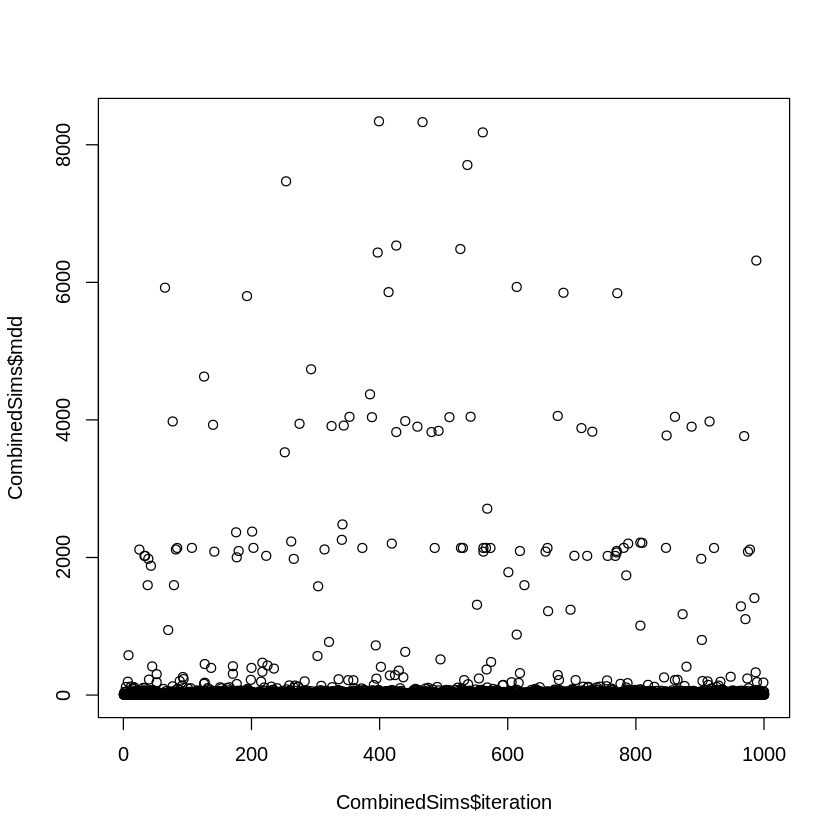

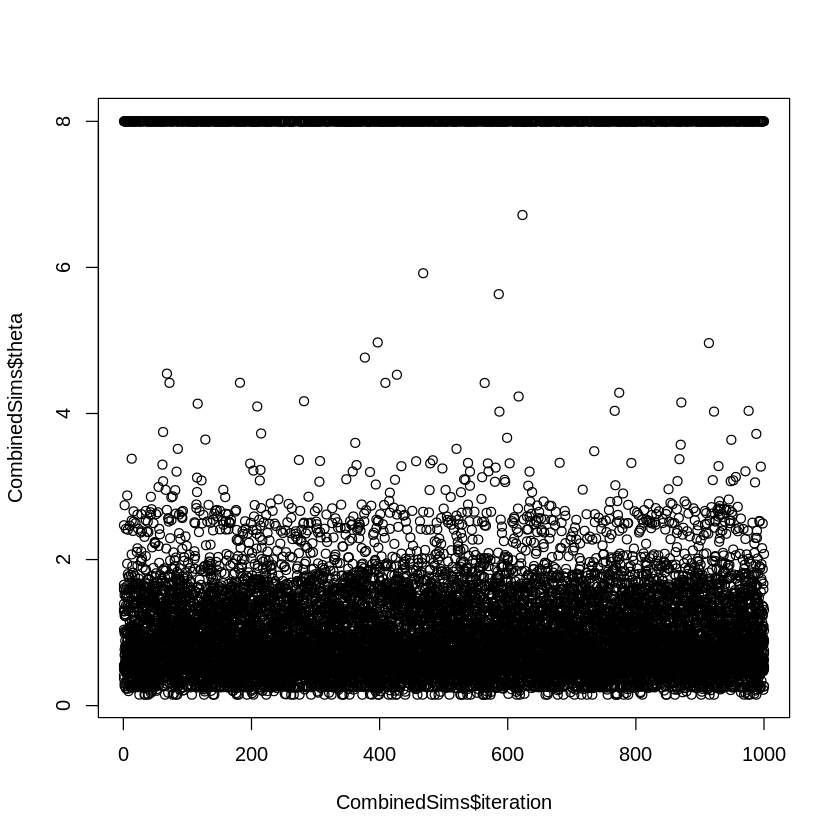

In [8]:
#check for obvious bias based on iteration, which would point to a problem in the for loop. Seems fine to me though 03/23/2021
plot(CombinedSims$mdd ~ CombinedSims$iteration)
plot(CombinedSims$theta ~ CombinedSims$iteration)

In [11]:
#FROM AFTER 1000 SIMS AND SAND FLATS excluded

#that's a fit where theta is at the boundary, not a good fit
CombinedSims %>%
    group_by(Adj, year) %>%
    filter(k==10 |k==-10 | theta==0.15 |theta== 8) %>% #how often are the fits at the boundary? as in, bad
    summarise(NObsBoundary=n()) %>%
    arrange(NObsBoundary) %>%
    filter(year=="2014") %>% #zero in on 2014
    ungroup() %>%
    summarise(NObsBoundary2014=sum(NObsBoundary))

nrow(CombinedSims %>% filter(year=="2014" & theta==8))


`summarise()` regrouping output by 'Adj' (override with `.groups` argument)


NObsBoundary2014
1187


[1] 1172

In [198]:
CombinedSims %>%
    group_by(Adj, year) %>%
    summarise_each(funs(min))

CombinedSims %>%
    filter(Adj=="SurvGrowth") %>%
    group_by(year) %>%
    summarise_each(funs(min))

Adj,year,k,theta,mdd,med,dist90,iteration
Growth,2012,-3.053527,0.1500000,7.801439,4.96,16.26,1
Growth,2013,-1.729249,1.3854956,2.877126,2.30,6.14,1
Growth,2014,-1.374318,1.0217415,2.281533,1.59,5.14,1
Growth,2012-14,-3.340957,0.3062867,8.363322,5.01,18.11,1
no,2012,-2.982347,0.1500000,7.723438,4.92,16.26,1
no,2013,-2.676413,0.3023630,6.191923,3.34,14.50,1
no,2014,-3.348197,0.1500000,8.710534,5.29,19.15,1
no,2012-14,-3.338111,0.3745957,8.340042,4.94,17.81,1
SurvGrowth,2012,-2.751642,0.1500000,7.762852,4.99,16.25,1
SurvGrowth,2013,-2.022038,0.2457217,6.164708,3.08,15.24,1


year,k,theta,mdd,med,dist90,iteration,Adj
2012,-2.751642,0.1500000,7.762852,4.99,16.25,1,SurvGrowth
2013,-2.022038,0.2457217,6.164708,3.08,15.24,1,SurvGrowth
2014,-3.379969,0.1997507,8.795665,5.96,18.89,1,SurvGrowth
2012-14,-3.331635,0.3989553,2.975040,1.68,7.30,1,SurvGrowth


In [57]:
AvgFits <-  CombinedSims %>% 
    select(-iteration) %>%
    group_by(year, Adj) %>%
    summarise_each(funs(mean)) %>%
    rename(Year="year", AvgSimK="k", AvgSimTheta="theta", AvgSimMDD="mdd", AvgSimMed="med", AvgSimDist90="dist90")

MinFits <-  CombinedSims %>% 
    select(-iteration) %>%
    group_by(year, Adj) %>%
    summarise_each(funs(min)) %>%
    rename(Year="year", MinSimK="k", MinSimTheta="theta", MinSimMDD="mdd", MinSimMed="med", MinSimDist90="dist90")

MaxFits <-  CombinedSims %>% 
    select(-iteration) %>%
    group_by(year, Adj) %>%
    summarise_each(funs(max)) %>%
    rename(Year="year", MaxSimK="k", MaxSimTheta="theta", MaxSimMDD="mdd", MaxSimMed="med", MaxSimDist90="dist90")

MedFits <-  CombinedSims %>% 
    select(-iteration) %>%
    group_by(year, Adj) %>%
    summarise_each(funs(median)) %>%
    rename(Year="year", MedSimK="k", MedSimTheta="theta", MedSimMDD="mdd", MedSimMed="med", MedSimDist90="dist90")

SDFits <-  CombinedSims %>% 
    select(-iteration) %>%
    group_by(year, Adj) %>%
    summarise_each(funs(sd)) %>%
    rename(Year="year", SDSimK="k", SDSimTheta="theta", SDSimMDD="mdd", SDSimMed="med", SDSimDist90="dist90")

SimSummary <- left_join(AvgFits, SDFits, by=c("Year", "Adj"))
SimSummary <- left_join(SimSummary, MinFits, by=c("Year", "Adj"))
SimSummary <- left_join(SimSummary, MaxFits, by=c("Year", "Adj"))
SimSummary2 <- left_join(SimSummary, MedFits, by=c("Year", "Adj")) 
                      
                        
                        #MaxFits, MedFits, by=c("Year", "Adj"))


In [58]:
SimCVWithin <- CombinedSims %>% #make a data frame that has the CV for select parameters/summary stats WITHIN an ensemble
    select(-iteration) %>%
    group_by(year, Adj) %>%
    mutate(CVSimMDDWithin=sd(mdd)/mean(mdd)) %>%
    mutate(CVSimKWithin=sd(k)/mean(k)) %>%
    mutate(CVSimThetaWithin=sd(theta)/mean(theta)) %>%
    mutate(CVSimMedWithin=sd(med)/mean(med)) %>%
    distinct(year, Adj, .keep_all = T) %>%
    select(year, Adj,CVSimMDDWithin, CVSimKWithin, CVSimThetaWithin, CVSimMedWithin) %>%
    rename(Year="year")





In [95]:
dim(SimSummary)

[1] 14 35

In [96]:
gather(SimSummary, 3:35, key=Stat, value=value)

Year,Adj,Stat,value
2012,no,AvgSimK,-1.38
2012,NoRecentRec,AvgSimK,-1.29
2012,Surv,AvgSimK,-1.47
2012,SurvNoRecentRec,AvgSimK,-1.11
2012-14,no,AvgSimK,-2.14
2012-14,NoRecentRec,AvgSimK,-1.69
2013,no,AvgSimK,-1.39
2013,NoRecentRec,AvgSimK,-0.83
2013,Surv,AvgSimK,-1.63
2013,SurvNoRecentRec,AvgSimK,-0.61


In [69]:
SimSummary <- left_join(SimSummary2, SimCVWithin, by=c("Year", "Adj")) %>%
    group_by(Adj) %>% #calculate the CV between years within an adjustment case
    mutate(CVSimMDDAmong=sd(AvgSimMDD)/mean(AvgSimMDD)) %>%
    mutate(CVSimKAmong=sd(AvgSimK)/mean(AvgSimK)) %>%
    mutate(CVSimThetaAmong=sd(AvgSimTheta)/mean(AvgSimTheta)) %>%
    mutate(CVSimMedAmong=sd(AvgSimMed)/mean(AvgSimMed)) 

SimSummary[,3:35] <- round(SimSummary[,3:35], digits=2)
SimSummary

#write.csv(SimSummary, file="~/oceanography/script_output/KernelFits/SimulationKernelFitsSummary.csv", row.names=F)

Year,Adj,AvgSimK,AvgSimTheta,AvgSimMDD,AvgSimMed,AvgSimDist90,SDSimK,SDSimTheta,SDSimMDD,...,MedSimMed,MedSimDist90,CVSimMDDWithin,CVSimKWithin,CVSimThetaWithin,CVSimMedWithin,CVSimMDDAmong,CVSimKAmong,CVSimThetaAmong,CVSimMedAmong
2012,no,-1.38,1.20,54.32,9.88,103.09,1.83,0.99,343.03,...,6.05,20.07,6.31,-1.32,0.83,2.66,0.81,-0.26,0.58,0.38
2012,NoRecentRec,-1.29,1.01,40.07,8.44,77.89,1.66,0.76,268.28,...,5.74,20.79,6.70,-1.29,0.75,2.40,0.96,-0.33,0.77,0.56
2012,Surv,-1.47,1.38,83.09,12.24,152.65,1.94,1.27,471.55,...,6.33,19.90,5.67,-1.32,0.92,2.94,1.13,-0.27,0.61,0.41
2012,SurvNoRecentRec,-1.11,0.95,56.54,9.67,107.20,1.86,0.65,328.07,...,5.74,21.17,5.80,-1.67,0.68,2.55,0.79,-0.45,0.87,0.62
2012-14,no,-2.14,1.31,10.06,6.90,22.89,0.78,1.10,2.24,...,6.72,21.13,0.22,-0.37,0.84,0.19,0.81,-0.26,0.58,0.38
2012-14,NoRecentRec,-1.69,1.20,11.58,6.84,27.35,1.00,1.54,5.54,...,6.34,23.46,0.48,-0.59,1.29,0.26,0.96,-0.33,0.77,0.56
2013,no,-1.39,0.87,7.88,4.77,18.71,0.90,0.50,1.83,...,4.56,17.70,0.23,-0.65,0.58,0.21,0.81,-0.26,0.58,0.38
2013,NoRecentRec,-0.83,0.66,8.18,4.27,20.05,0.90,0.39,3.70,...,4.12,18.59,0.45,-1.09,0.58,0.21,0.96,-0.33,0.77,0.56
2013,Surv,-1.63,0.97,7.79,5.00,18.21,0.85,0.47,2.01,...,4.90,17.37,0.26,-0.52,0.49,0.20,1.13,-0.27,0.61,0.41
2013,SurvNoRecentRec,-0.61,0.60,8.36,4.14,20.69,0.88,0.37,2.98,...,4.02,19.23,0.36,-1.44,0.61,0.18,0.79,-0.45,0.87,0.62


In [84]:
SimSummary %>%
    select(Year, Adj, MinSimMDD, AvgSimMDD, MaxSimMDD)

Year,Adj,MinSimMDD,AvgSimMDD,MaxSimMDD
2012,no,7.72,54.32,3983.21
2012,NoRecentRec,7.72,40.07,4057.83
2012,Surv,7.73,83.09,4046.13
2012,SurvNoRecentRec,7.73,56.54,3977.85
2012-14,no,7.88,10.06,32.74
2012-14,NoRecentRec,8.10,11.58,96.08
2013,no,5.88,7.88,39.04
2013,NoRecentRec,5.77,8.18,93.65
2013,Surv,5.90,7.79,58.74
2013,SurvNoRecentRec,5.89,8.36,56.51


In [62]:
#read in the empirical data
kernels <- read.csv(file="~/parentage/kernel_fitting/1340_loci/final_results/tables/kernel_fitting_summary.csv", header=T, stringsAsFactors = F) %>%
    select(Year, best_k, best_theta, MeanDispDist, MedianDispDist, Dist90Retained) %>%
    rename(GenK="best_k", GenTheta="best_theta", GenMDD="MeanDispDist", GenMed="MedianDispDist", GenDist90="Dist90Retained") %>%
    mutate(GenMDD=round(GenMDD, digits=2))

kernel2012_14 <- read.csv(file="~/oceanography/empirical_data/genetics/GenKernelsForROMSComp2012-14.csv", header=T, stringsAsFactors = F) %>%
    rename(Year="year",GenK="k", GenTheta="theta", GenMDD="mdd", GenMed="med", GenDist90="dist90") %>%
    mutate(GenK=round(GenK, digits=2)) %>%
    mutate(GenTheta=round(GenTheta, digits=2)) %>%
    mutate(GenMDD=round(GenMDD, digits=2))

kernels2 <- bind_rows(kernels, kernel2012_14)

In [78]:
SimPlusGenFits <- left_join(SimSummary, kernels2, by="Year")

#write.csv(SimPlusGenFits, file="~/oceanography/script_output/KernelFits/SimPlusGenKernelFits.csv", row.names=F)

In [77]:
SimPlusGenFits

Year,Adj,AvgSimK,AvgSimTheta,AvgSimMDD,AvgSimMed,AvgSimDist90,SDSimK,SDSimTheta,SDSimMDD,...,CVSimMedWithin,CVSimMDDAmong,CVSimKAmong,CVSimThetaAmong,CVSimMedAmong,GenK,GenTheta,GenMDD,GenMed,GenDist90
2012,no,-1.38,1.20,54.32,9.88,103.09,1.83,0.99,343.03,...,2.66,0.81,-0.26,0.58,0.38,-2.36,1.03,10.17,7.13,23.29
2012,NoRecentRec,-1.29,1.01,40.07,8.44,77.89,1.66,0.76,268.28,...,2.40,0.96,-0.33,0.77,0.56,-2.36,1.03,10.17,7.13,23.29
2012,Surv,-1.47,1.38,83.09,12.24,152.65,1.94,1.27,471.55,...,2.94,1.13,-0.27,0.61,0.41,-2.36,1.03,10.17,7.13,23.29
2012,SurvNoRecentRec,-1.11,0.95,56.54,9.67,107.20,1.86,0.65,328.07,...,2.55,0.79,-0.45,0.87,0.62,-2.36,1.03,10.17,7.13,23.29
2012-14,no,-2.14,1.31,10.06,6.90,22.89,0.78,1.10,2.24,...,0.19,0.81,-0.26,0.58,0.38,1.68,0.30,27.77,7.71,68.69
2012-14,NoRecentRec,-1.69,1.20,11.58,6.84,27.35,1.00,1.54,5.54,...,0.26,0.96,-0.33,0.77,0.56,1.68,0.30,27.77,7.71,68.69
2013,no,-1.39,0.87,7.88,4.77,18.71,0.90,0.50,1.83,...,0.21,0.81,-0.26,0.58,0.38,4.04,0.22,69.59,12.20,157.36
2013,NoRecentRec,-0.83,0.66,8.18,4.27,20.05,0.90,0.39,3.70,...,0.21,0.96,-0.33,0.77,0.56,4.04,0.22,69.59,12.20,157.36
2013,Surv,-1.63,0.97,7.79,5.00,18.21,0.85,0.47,2.01,...,0.20,1.13,-0.27,0.61,0.41,4.04,0.22,69.59,12.20,157.36
2013,SurvNoRecentRec,-0.61,0.60,8.36,4.14,20.69,0.88,0.37,2.98,...,0.18,0.79,-0.45,0.87,0.62,4.04,0.22,69.59,12.20,157.36


In [81]:
#what simulations best represent the genetic data, based on MDD as a rough summary stat that incorporates shape and scale of fit
SimPlusGenFits %>%
    mutate(MDDDiffGenVSim=abs(GenMDD-AvgSimMDD)) %>%
    group_by(Year) %>%
    arrange(MDDDiffGenVSim) %>%
    filter(MDDDiffGenVSim==min(MDDDiffGenVSim))
#SimPlusGenFits %>%
#    mutate(MDDDiffGenVSim=abs(GenMDD-AvgSimMDD)) %>%
#    group_by(Year) %>%
#    arrange(MDDDiffGenVSim)
#
#
#write.csv(SimPlusGenFits, file="~/oceanography/script_output/KernelFits/SimPlusGenKernelFitsAnnual.csv", row.names=F)

Year,Adj,AvgSimK,AvgSimTheta,AvgSimMDD,AvgSimMed,AvgSimDist90,SDSimK,SDSimTheta,SDSimMDD,...,CVSimMDDAmong,CVSimKAmong,CVSimThetaAmong,CVSimMedAmong,GenK,GenTheta,GenMDD,GenMed,GenDist90,MDDDiffGenVSim
2014,Surv,-2.40,3.06,17.77,10.03,38.50,1.24,2.97,53.99,...,1.13,-0.27,0.61,0.41,0.49,0.38,15.04,5.53,38.13,2.73
2012-14,NoRecentRec,-1.69,1.20,11.58,6.84,27.35,1.00,1.54,5.54,...,0.96,-0.33,0.77,0.56,1.68,0.30,27.77,7.71,68.69,16.19
2012,NoRecentRec,-1.29,1.01,40.07,8.44,77.89,1.66,0.76,268.28,...,0.96,-0.33,0.77,0.56,-2.36,1.03,10.17,7.13,23.29,29.90
2013,SurvNoRecentRec,-0.61,0.60,8.36,4.14,20.69,0.88,0.37,2.98,...,0.79,-0.45,0.87,0.62,4.04,0.22,69.59,12.20,157.36,61.23


In [83]:

#what about just looking at theta?
SimPlusGenFits %>%
    mutate(ThetaDiffGenVSim=abs(GenTheta-AvgSimTheta)) %>%
    group_by(Year) %>%
    arrange(ThetaDiffGenVSim) %>%
    filter(ThetaDiffGenVSim==min(ThetaDiffGenVSim)) %>%
    select(Year, Adj, AvgSimK, GenK, AvgSimTheta, GenTheta, AvgSimMDD, GenMDD)
#SimPlusGenFits %>%
#    mutate(ThetaDiffGenVSim=abs(GenTheta-AvgSimTheta)) %>%
#    group_by(Year) %>%
#    arrange(ThetaDiffGenVSim)

Year,Adj,AvgSimK,GenK,AvgSimTheta,GenTheta,AvgSimMDD,GenMDD
2012,NoRecentRec,-1.29,-2.36,1.01,1.03,40.07,10.17
2013,SurvNoRecentRec,-0.61,4.04,0.60,0.22,8.36,69.59
2012-14,NoRecentRec,-1.69,1.68,1.20,0.30,11.58,27.77
2014,no,-2.28,0.49,2.93,0.38,42.12,15.04


In [86]:
#look at the CV among years in the genetics and three cases
RealKernelVar <- kernels2 %>%
    filter(Year %in% c("2012", "2013", "2014")) %>%
    mutate(CVGenMDD=sd(GenMDD)/mean(GenMDD))%>%
    mutate(CVGenMed=sd(GenMed)/mean(GenMed))%>%
    mutate(CVGenTheta=sd(GenTheta)/mean(GenTheta)) %>%
    mutate(CVGenK=sd(GenK)/mean(GenK)) %>%
    distinct(CVGenMDD, CVGenMed, CVGenTheta, CVGenK)
RealKernelVar

CVGenMDD,CVGenMed,CVGenTheta,CVGenK
1.043997,0.4202158,0.7895541,4.432775


In [89]:
SimKernelVar <- SimSummary %>%
    select(CVSimMDDAmong, CVSimMedAmong, CVSimThetaAmong, CVSimKAmong)
SimKernelVar

Adding missing grouping variables: `Adj`


Adj,CVSimMDDAmong,CVSimMedAmong,CVSimThetaAmong,CVSimKAmong
no,0.81,0.38,0.58,-0.26
NoRecentRec,0.96,0.56,0.77,-0.33
Surv,1.13,0.41,0.61,-0.27
SurvNoRecentRec,0.79,0.62,0.87,-0.45
no,0.81,0.38,0.58,-0.26
NoRecentRec,0.96,0.56,0.77,-0.33
no,0.81,0.38,0.58,-0.26
NoRecentRec,0.96,0.56,0.77,-0.33
Surv,1.13,0.41,0.61,-0.27
SurvNoRecentRec,0.79,0.62,0.87,-0.45


In [ ]:
ggplot(data=SimKernelVar, aes(x=Adj, y=mdd, color=year, fill=year), alpha=0.5) +
    geom_point(data=SimPlusGenFits, aes(x=Year, y=AvgSimMDD, shape=Adj), fill=NA, color="black", size=3) + 
    geom_point(data=SimPlusGenFits, aes(x=Year, y=GenMDD), fill="red", color="red") + # with all fits


Warning message:
“Removed 11 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 2 rows containing missing values (geom_point).”Saving 6.67 x 6.67 in image
Warning message:
“Removed 11 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 2 rows containing missing values (geom_point).”

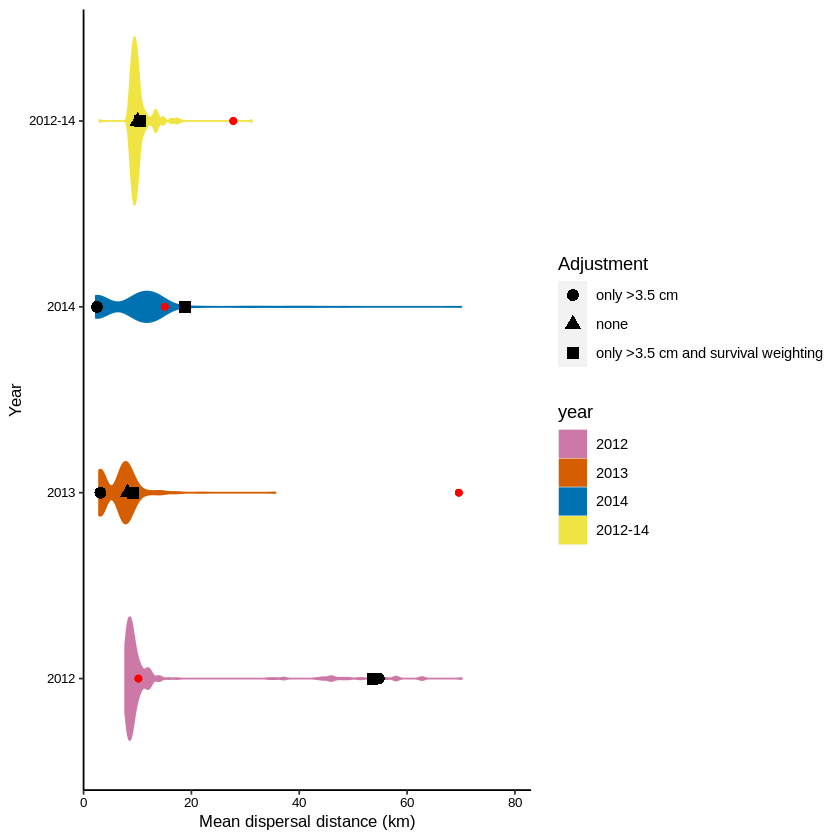

In [195]:
cbbPalette <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
cbbPalette_rev <- rev(cbbPalette)

CombinedSims$year <- factor(CombinedSims$year, levels=c("2012", "2013", "2014", "2012-14"))
SimPlusGenFits$Year <- factor(SimPlusGenFits$Year, levels=c("2012", "2013", "2014", "2012-14"))

mdd_violin <- ggplot(data=CombinedSims, aes(x=year, y=mdd, color=year, fill=year), alpha=0.5) +
    geom_violin() +
    geom_point(data=SimPlusGenFits, aes(x=Year, y=AvgSimMDD, shape=Adj), fill=NA, color="black", size=3) + 
    geom_point(data=SimPlusGenFits, aes(x=Year, y=GenMDD), fill="red", color="red") + # with all fits
    #geom_point(data=kernels %>% filter(Year %in% c("2012", "2013", "2014", "all")), aes(x=Year, y=MeanDispDist), fill="black",color="darkgray", shape=24) + #genetic estimates
    coord_flip() +
    scale_shape_discrete(name = "Adjustment", labels = c("only >3.5 cm", "none", "only >3.5 cm and survival weighting"))+
    #scale_x_continuous(limits = c(0, 100), expand=c(0,0)) +
    scale_y_continuous(limits = c(0, 83), expand = c(0,0))+
    theme(panel.grid.major = element_blank(),
    plot.margin=unit(c(0.2,0.2,0.2,0.2),"cm"),
    panel.grid.minor = element_blank(), 
    panel.background = element_blank(), #,
    axis.line = element_line(colour = "black")) +
    xlab("Year") + 
    ylab("Mean dispersal distance (km)") +
    theme(axis.text.x = element_text(size=8, color="black", family="Helvetica"),#15 for publication, 20 for presentation #element_text(size=15, color="black", family="Helvetica"),
    axis.text.y =  element_text(size=8, color="black", family="Helvetica"),
    axis.title.y =  element_text(size=10, color="black", family="Helvetica"), 
    axis.title.x =  element_text(size=10, color="black", family="Helvetica")) + 
    scale_colour_manual(values=cbbPalette_rev)+
    scale_fill_manual(values=cbbPalette_rev)
    #scale_y_continuous(breaks = 1:2000, labels = c(1:50,"break",1000:2000))
mdd_violin
ggplot2::ggsave(filename="SimMeanDispDistPlusGenPoints.png",  plot=mdd_violin, path="~/oceanography/script_output/KernelFits/Plots/")


In [161]:
#read in the seasonal simulation kernel fits

#no adjustments
SimulatedKernelsNEM <-  read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernelsNEM.csv", header=T) %>%
    mutate(Adj="no")
SimulatedKernelsSWM <-  read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernelsSWM.csv", header=T) %>%
    mutate(Adj="no")

#adjusting for survival and growth
SimulatedKernelsNEMSurvGrowth <-  read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernelsNEMSurvGrowth.csv", header=T) %>%
    mutate(Adj="SurvGrowth")
SimulatedKernelsSWMSurvGrowth <-  read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernelsSWMSurvGrowth.csv", header=T) %>%
    mutate(Adj="SurvGrowth")

#adjusting for growth
SimulatedKernelsNEMGrowth <-  read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernelsNEMGrowth.csv", header=T) %>%
    mutate(Adj="Growth")
SimulatedKernelsSWMGrowth <-  read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernelsSWMGrowth.csv", header=T) %>%
    mutate(Adj="Growth")

CombinedSeasons <- bind_rows(SimulatedKernelsNEM, SimulatedKernelsSWM, SimulatedKernelsNEMSurvGrowth, SimulatedKernelsSWMSurvGrowth, SimulatedKernelsNEMGrowth, SimulatedKernelsSWMGrowth) %>%
    rename(Season="season") 

#empirical seasons for 2012-2014
SeasonalKernels2012_14 <- read.csv(file="~/oceanography/empirical_data/genetics/SeasonalGenKernelsForROMSComp.csv", header=T) %>%
    rename(Season="season",GenK="k", GenTheta="theta", GenMDD="mdd", GenMed="med", GenDist90="dist90") %>%
    mutate(GenK=round(GenK, digits=2)) %>%
    mutate(GenTheta=round(GenTheta, digits=2)) %>%
    mutate(GenMDD=round(GenMDD, digits=2)) %>%
    mutate(TimeFrame="2012-14")#%>%
    #mutate(JoinKey="all")


SeasonalKernels2012_18 <- read.csv(file="~/parentage/kernel_fitting/1340_loci/final_results/tables/RecruitSizeAsSeasonlity_summary.csv", header=T) %>%
    select(Season, best_k, best_theta, MeanDispersalDistance, MedianDispersalDistance, Dist90Retained) %>%    
    rename(GenK="best_k", GenTheta="best_theta", GenMDD="MeanDispersalDistance", GenMed="MedianDispersalDistance", GenDist90="Dist90Retained") %>%
    mutate(GenMDD=round(GenMDD, digits=2)) %>%
    mutate(TimeFrame="2012-18")#%>%
    #mutate(JoinKey="all")

GenSeasonalKernels <- bind_rows(SeasonalKernels2012_14, SeasonalKernels2012_18)

In [151]:
head(CombinedSeasons)

Season,k,theta,mdd,med,dist90,iteration,Adj
NEM,-2.49,1.30,8.94,6.78,19.71,1,no
NEM,0.85,0.34,21.84,7.14,55.00,2,no
NEM,-1.38,0.64,10.05,5.59,24.73,3,no
NEM,-2.06,0.91,9.06,6.05,21.17,4,no
NEM,-2.52,1.33,9.04,6.91,19.86,5,no
NEM,-1.92,0.84,9.04,5.82,21.40,6,no


In [162]:
AvgSeasonalKernels <- CombinedSeasons %>% 
    select(-iteration) %>%
    group_by(Season, Adj) %>%
    summarise_each(funs(mean)) %>%
    mutate(k=round(k, digits=2)) %>%
    mutate(theta=round(theta, digits=2)) %>%
    mutate(mdd=round(mdd, digits=2))%>%
    mutate(med=round(med, digits=2))%>%
    mutate(dist90=round(dist90, digits=2)) %>%
    rename(AvgSimK="k", AvgSimTheta="theta", AvgSimMDD="mdd", AvgSimMed="med", AvgSimDist90="dist90") %>%
    mutate(TimeFrame="2012-14")# %>%
    #mutate(JoinKey="all")

In [189]:
SimPlusGenFitsSeasons <- right_join(AvgSeasonalKernels, GenSeasonalKernels, by=c("Season", "TimeFrame"))%>%
    mutate(MDDDiffGenVSim=abs(GenMDD-AvgSimMDD)) %>%
    arrange(MDDDiffGenVSim) %>%
    mutate(GenK=round(GenK, digits=2)) %>%
    mutate(GenTheta=round(GenTheta, digits=2)) %>%
    mutate(GenMDD=round(GenMDD, digits=2))

SimPlusGenFitsSeasons %>%
    group_by(Season) %>%
    filter(MDDDiffGenVSim==min(MDDDiffGenVSim, na.rm=T))

SimPlusGenFitsSeasons

#write.csv(SimPlusGenFits, file="~/oceanography/script_output/KernelFits/SimPlusGenKernelFitsSeasons.csv", row.names=F)

Season,Adj,AvgSimK,AvgSimTheta,AvgSimMDD,AvgSimMed,AvgSimDist90,TimeFrame,GenK,GenTheta,GenMDD,GenMed,GenDist90,MDDDiffGenVSim
SWM,no,-2.45,1.39,8.58,6.57,18.77,2012-14,-1.62,0.76,8.34,5.1,20.07,0.24
NEM,SurvGrowth,-2.02,1.17,10.10,6.69,23.37,2012-14,6.95,0.15,2755.86,212.8,4810.04,2745.76


Season,Adj,AvgSimK,AvgSimTheta,AvgSimMDD,AvgSimMed,AvgSimDist90,TimeFrame,GenK,GenTheta,GenMDD,GenMed,GenDist90,MDDDiffGenVSim
SWM,no,-2.45,1.39,8.58,6.57,18.77,2012-14,-1.62,0.76,8.34,5.10,20.07,0.24
SWM,SurvGrowth,-2.44,1.37,8.63,6.59,18.94,2012-14,-1.62,0.76,8.34,5.10,20.07,0.29
SWM,Growth,-2.40,1.32,8.66,6.52,19.13,2012-14,-1.62,0.76,8.34,5.10,20.07,0.32
NEM,SurvGrowth,-2.02,1.17,10.10,6.69,23.37,2012-14,6.95,0.15,2755.86,212.80,4810.04,2745.76
NEM,Growth,-2.04,1.17,10.01,6.66,23.13,2012-14,6.95,0.15,2755.86,212.80,4810.04,2745.85
NEM,no,-2.08,1.26,9.95,6.72,22.82,2012-14,6.95,0.15,2755.86,212.80,4810.04,2745.91
SWM,NA,NA,NA,NA,NA,NA,2012-18,-2.60,1.58,8.57,6.87,18.32,NA
NEM,NA,NA,NA,NA,NA,NA,2012-18,-0.89,0.56,9.45,4.82,23.60,NA


Warning message:
“Removed 2 rows containing missing values (geom_point).”Saving 6.67 x 6.67 in image
Warning message:
“Removed 2 rows containing missing values (geom_point).”

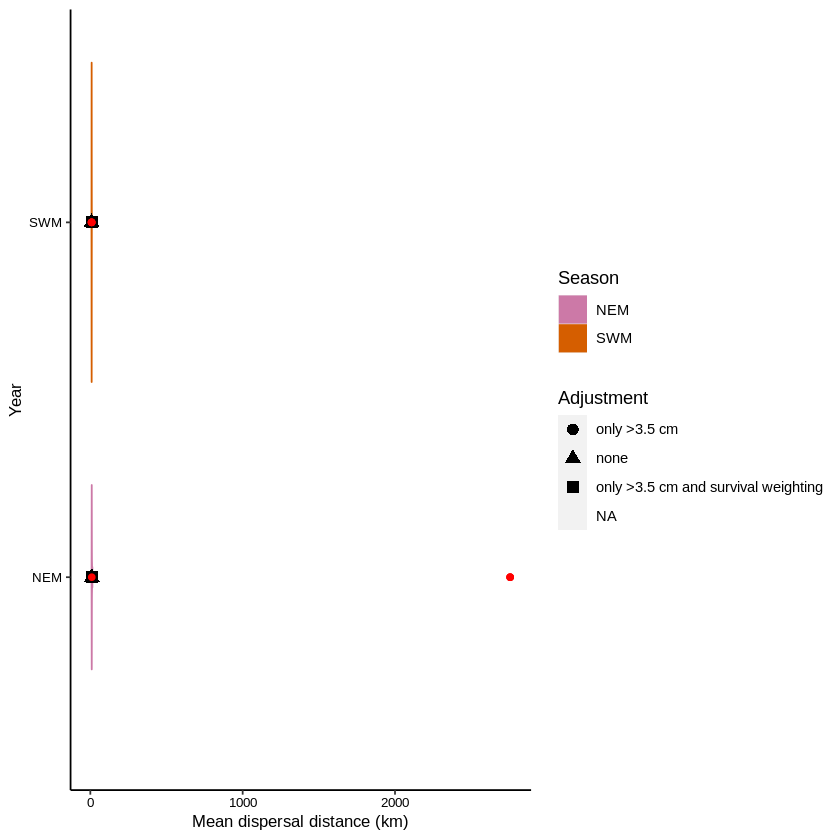

In [193]:
cbbPalette <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
cbbPalette_rev <- rev(cbbPalette)

#CombinedSeasons$Season <- factor(CombinedSeasons$Season, levels=c("2012", "2013", "2014", "2012-14"))
#SimPlusGenFitsSeasons$Season <- factor(SimPlusGenFitsSeasons$Season, levels=c("2012", "2013", "2014", "2012-14"))

mdd_violin <- ggplot(data=CombinedSeasons, aes(x=Season, y=mdd, color=Season, fill=Season), alpha=0.5) +
    geom_violin() +
    geom_point(data=SimPlusGenFitsSeasons, aes(x=Season, y=AvgSimMDD, shape=Adj), fill=NA, color="black", size=3) + 
    geom_point(data=SimPlusGenFitsSeasons, aes(x=Season, y=GenMDD), fill="red", color="red") + # with all fits
    #geom_point(data=kernels %>% filter(Year %in% c("2012", "2013", "2014", "all")), aes(x=Year, y=MeanDispDist), fill="black",color="darkgray", shape=24) + #genetic estimates
    coord_flip() +
    scale_shape_discrete(name = "Adjustment", labels = c("only >3.5 cm", "none", "only >3.5 cm and survival weighting"))+
    #scale_x_continuous(limits = c(0, 100), expand=c(0,0)) +
    #scale_y_continuous(limits = c(0, 30), expand = c(0,0))+
    theme(panel.grid.major = element_blank(),
    plot.margin=unit(c(0.2,0.2,0.2,0.2),"cm"),
    panel.grid.minor = element_blank(), 
    panel.background = element_blank(), #,
    axis.line = element_line(colour = "black")) +
    xlab("Year") + 
    ylab("Mean dispersal distance (km)") +
    theme(axis.text.x = element_text(size=8, color="black", family="Helvetica"),#15 for publication, 20 for presentation #element_text(size=15, color="black", family="Helvetica"),
    axis.text.y =  element_text(size=8, color="black", family="Helvetica"),
    axis.title.y =  element_text(size=10, color="black", family="Helvetica"), 
    axis.title.x =  element_text(size=10, color="black", family="Helvetica")) + 
    scale_colour_manual(values=cbbPalette_rev)+
    scale_fill_manual(values=cbbPalette_rev)
    #scale_y_continuous(breaks = 1:2000, labels = c(1:50,"break",1000:2000))
mdd_violin
ggplot2::ggsave(filename="SimMeanDispDistPlusGenPointsSeasons.png",  plot=mdd_violin, path="~/oceanography/script_output/KernelFits/Plots/")


In [192]:
cbbPalette <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
cbbPalette_rev <- rev(cbbPalette)

mdd_violin <- ggplot(data=SimCombinedSummary, aes(x=year, y=mdd, color=year, fill=year), alpha=0.5) +
    geom_violin() +
    #geom_point(data=AverageFits2, aes(x=year, y=mdd), fill="snow",color="darkgray", shape=21) + #without borderline fits
    geom_point(data=AverageFits, aes(x=year, y=mdd), fill="black ",color="darkgray", shape=21) + # with all fits
    geom_point(data=kernels %>% filter(Year %in% c("2012", "2013", "2014", "all")), aes(x=Year, y=MeanDispDist), fill="black",color="darkgray", shape=24) + #genetic estimates
    coord_flip() +
    #scale_x_continuous(limits = c(0, 100), expand=c(0,0)) +
    scale_y_continuous(limits = c(0, 83), expand = c(0,0))+
    theme(panel.grid.major = element_blank(),
    plot.margin=unit(c(0.2,0.2,0.2,0.2),"cm"),
    panel.grid.minor = element_blank(), 
    panel.background = element_blank(), #,
    axis.line = element_line(colour = "black")) +
    xlab("Year") + 
    ylab("Mean dispersal distance (km)") +
    theme(axis.text.x = element_text(size=8, color="black", family="Helvetica"),#15 for publication, 20 for presentation #element_text(size=15, color="black", family="Helvetica"),
    axis.text.y =  element_text(size=8, color="black", family="Helvetica"),
    axis.title.y =  element_text(size=10, color="black", family="Helvetica"), 
    axis.title.x =  element_text(size=10, color="black", family="Helvetica"),    
    legend.position = "none") + 
    scale_colour_manual(values=cbbPalette_rev)+
    scale_fill_manual(values=cbbPalette_rev)
    #scale_y_continuous(breaks = 1:2000, labels = c(1:50,"break",1000:2000))
mdd_violin
ggplot2::ggsave(filename="SimMeanDispDistPlusGenPoints.png",  plot=mdd_violin, path="~/oceanography/script_output/KernelFits/Plots/")


ERROR: Error in ggplot(data = SimCombinedSummary, aes(x = year, y = mdd, color = year, : object 'SimCombinedSummary' not found


In [115]:
(SimPlusGenFits)

year,SimK,SimTheta,SimMDD,SimKurtosis,GenK,GenTheta,GenMDD,GenMedDispDist
2012,-1.828326,1.250510,10.127328,15.518027,-2.36,1.03,10.165094,7.13
2013,-1.242150,0.804757,8.091848,13.967938,4.04,0.22,69.586280,12.20
2014,-1.926596,1.243059,26.376964,86.415760,0.49,0.38,15.037515,5.53
all,-1.919426,1.014670,10.219857,8.635482,-2.51,1.49,8.153016,6.44


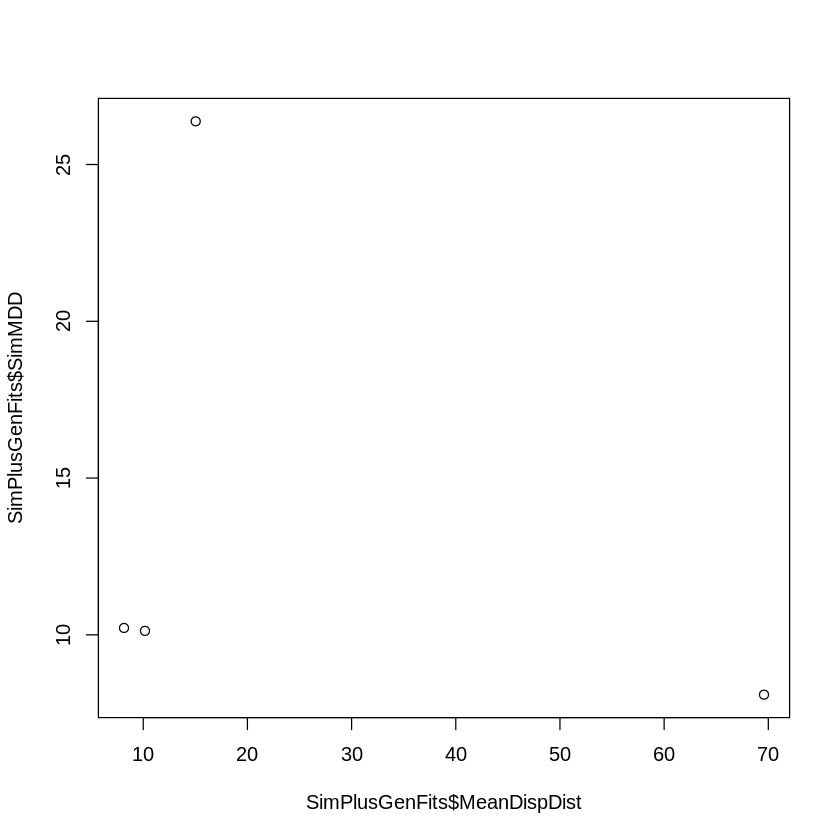

In [95]:
plot(SimPlusGenFits$SimMDD~SimPlusGenFits$MeanDispDist)

In [60]:
MDDAllYear <- CombinedSims %>% 
    filter(year=="all")
#pdf("~/oceanography/script_output/KernelFits/Plots/MeanDispDistHist2012-14.pdf")
hist(MDDAllYear$mdd, breaks=100, main=NULL, xlab="Mean dispersal distance (km)")
#dev.off()
summary(MDDAllYear$mdd)

Warning message in min(x):
“no non-missing arguments to min; returning Inf”Warning message in max(x):
“no non-missing arguments to max; returning -Inf”

ERROR: Error in hist.default(MDDAllYear$mdd, breaks = 100, main = NULL, xlab = "Mean dispersal distance (km)"): character(0)


In [97]:
#test for correlations
cor.test(SimPlusGenFits$SimMDD, SimPlusGenFits$MeanDispDist,  method = "pearson")
cor.test(SimPlusGenFits$SimTheta, SimPlusGenFits$GenTheta,  method = "pearson")



	Pearson's product-moment correlation

data:  SimPlusGenFits$SimMDD and SimPlusGenFits$MeanDispDist
t = -0.53384, df = 2, p-value = 0.6468
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9812079  0.9202897
sample estimates:
       cor 
-0.3531582 



	Pearson's product-moment correlation

data:  SimPlusGenFits$SimTheta and SimPlusGenFits$GenTheta
t = 0.32913, df = 2, p-value = 0.7733
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9389710  0.9752907
sample estimates:
      cor 
0.2266754 


In [17]:
#seasons
SimulatedKernelsNEM <-  read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernelsNEM.csv", header=T)
SimulatedKernelsSWM <-  read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernelsSWM.csv", header=T)
CombinedSeasons <- bind_rows(SimulatedKernelsNEM, SimulatedKernelsSWM) %>%
    select(-iteration)

In [24]:
SeasonalKernels <- read.csv(file="~/parentage/kernel_fitting/1340_loci/final_results/tables/RecruitSizeAsSeasonlity_summary.csv", header=T)
head(SeasonalKernels)

Season,RecruitSizeAtSampling,best_k,best_theta,k_CI95_lower,k_CI95_upper,theta_CI95_lower,theta_CI95_upper,MeanDispersalDistance,MeanDispDist_CI95_lower,MeanDispDist_CI95_upper,MedianDispersalDistance,MedianDispDist_CI95_lower,MedianDispDist_CI95_upper,Dist90Retained
SWM,> 4.5 cm,-2.60,1.58,-2.63,-2.47,1.34,1.59,8.574871,7.132250,10.39623,6.87,4.93,9.28,18.32
NEM,< 3.5 cm,-0.89,0.56,-1.46,-0.74,0.54,0.61,9.446898,6.014163,4272.46841,4.82,3.24,323.37,23.60
